In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import MeanShift
from scipy.spatial.distance import cdist

%matplotlib inline

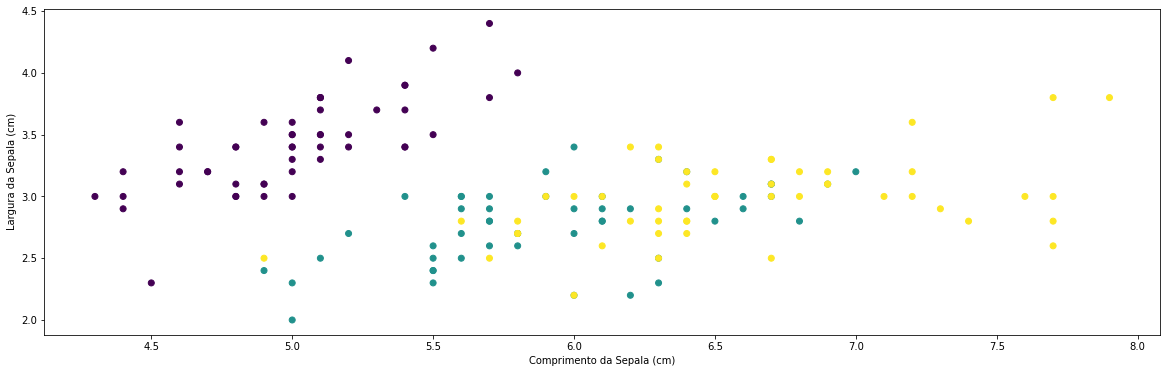

In [14]:
# Carregando o dataset
iris = load_iris()
X = iris.data
y = iris.target

# Visualizando os dados
plt.figure(figsize=(20, 6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('Comprimento da Sepala (cm)')
plt.ylabel('Largura da Sepala (cm)')
plt.show() 

In [15]:
class Mean_Shift():
    def __init__(self, bandwidth, radius=None):
        self.bandwidth = bandwidth
        self.radius = self.bandwidth if radius is None else radius
    
    def fit(self, x):
        centroids = np.array(x).copy()
        centroids_last = np.zeros(x.shape)
        
        while not np.allclose(centroids, centroids_last, rtol=1e-10, atol=1e-10):
            centroids_last = centroids.copy()
            
            for i, centroid in enumerate(centroids):
                distances = euclidean_distance(centroid, x)
                neighbours = x[distances <= self.radius]
                distances = distances[distances <= self.radius]
                
                weights = gaussian_kernel(distances, self.bandwidth).reshape(-1, 1)
                centroids[i] = np.sum(weights * neighbours, axis=0) / weights.sum()
                
        self.cluster_centers_ = np.unique(np.round(centroids, decimals=9), axis=0)
        
    def predict(self, x):
        pass


In [16]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((np.array(a) - np.array(b))**2, axis=1))

def gaussian_kernel(d, bandwidth):
    return np.exp(-0.5 * (d / bandwidth)**2) / (bandwidth * np.sqrt(2 * np.pi))


In [17]:
mean_shift = Mean_Shift(bandwidth=0.8, radius=0.8)
mean_shift.fit(x)

print(mean_shift.cluster_centers_)


[[4.97604459 3.39690455 1.47623078 0.24498991]
 [5.76518162 2.73383144 4.15928049 1.26757822]
 [5.77747186 2.72057567 4.16907389 1.27341941]
 [5.89140393 2.78826427 4.28363024 1.33786629]
 [6.04247339 2.86293564 4.55397582 1.4829943 ]
 [6.05522098 2.87854444 4.50552959 1.44087054]
 [6.05824948 2.84886656 4.56947824 1.4831663 ]
 [6.07314994 2.8771347  4.51332983 1.44093248]
 [6.07886784 2.85464902 4.59460132 1.49520134]
 [6.20057772 2.86826266 4.74697492 1.59194215]
 [6.2099553  2.87523024 4.72370079 1.57547024]
 [6.21175344 2.86754004 4.75941567 1.59867337]
 [6.21254143 2.87658584 4.74046052 1.58257562]
 [6.22194679 2.8746411  4.79121991 1.60886702]
 [6.22427875 2.87604261 4.75303014 1.5892461 ]
 [6.3366304  2.94973747 5.23508101 1.94661903]
 [6.41557852 2.9736518  5.32935402 2.02370392]
 [6.52168963 3.00919225 5.40086072 2.05358153]
 [6.52800725 3.02524039 5.43830824 2.07634845]
 [6.58722754 3.06556943 5.51650488 2.13410831]
 [7.8        3.8        6.55       2.1       ]]


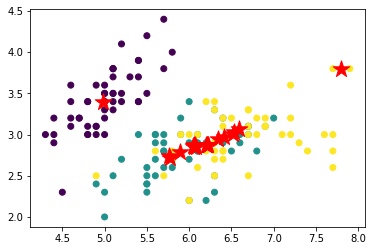

In [18]:
plt.scatter(x[:, 0], x[:, 1], c=iris.target)
plt.scatter(mean_shift.cluster_centers_[:, 0], mean_shift.cluster_centers_[:, 1], c='red', marker='*', s=300)
